In [27]:
#import necessary files
import numpy as np
import pandas as pd
import syllapy
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
import warnings
import spacy
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize
pd.set_option('display.max_columns', 90)  # display all column of dataframe
pd.set_option('display.max_row', 100)     # display 100 rows of the dataframe
pd.set_option('display.max_colwidth', -1) # display all values within cells
pd.set_option('display.float_format', '{:.5f}'.format)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jakelieberfarb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

This notebook will look at exploring the training and testing data for the [Feedback Prize - Predicting Effective Arguments](https://www.kaggle.com/competitions/feedback-prize-effectiveness/overview)

In [3]:
df = pd.read_csv('/Users/jakelieberfarb/Desktop/college/Kaggle Competition/feedback-prize-effectiveness/Data/train.csv')
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, ""It's not easy to target Cydonia,"" in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by alieans because they thought that there was life on Mars.,Counterclaim,Adequate


In [4]:
df.shape

(36765, 5)

In [5]:
pie_data= count_values_in_column(df,"discourse_type") # save data aS a dataframe
count_values_in_column(df,"discourse_type")

,Total,Percentage
Evidence,12105,32.93000
Claim,11977,32.58000
Position,4024,10.95000
Concluding Statement,3351,9.11000
Lead,2291,6.23000
Counterclaim,1773,4.82000
Rebuttal,1244,3.38000


<function matplotlib.pyplot.show(close=None, block=None)>

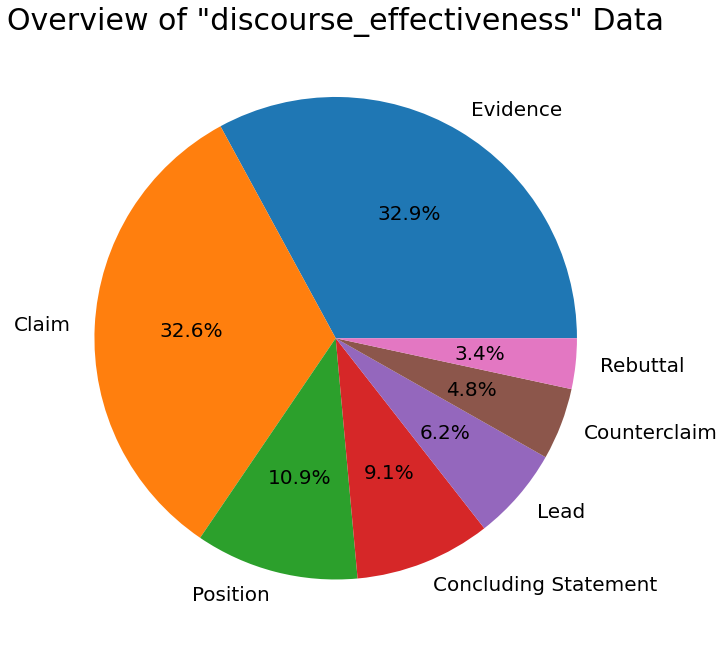

In [6]:
plt.figure(figsize=(10,10))
labels = ['Evidence', 'Claim', 'Position', 'Concluding Statement', 'Lead','Counterclaim', 'Rebuttal']
plt.title('Overview of "discourse_effectiveness" Data', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show


In [7]:
pie_data= count_values_in_column(df,"discourse_effectiveness") # save data aS a dataframe
count_values_in_column(df,"discourse_effectiveness")

,Total,Percentage
Adequate,20977,57.06000
Effective,9326,25.37000
Ineffective,6462,17.58000


<function matplotlib.pyplot.show(close=None, block=None)>

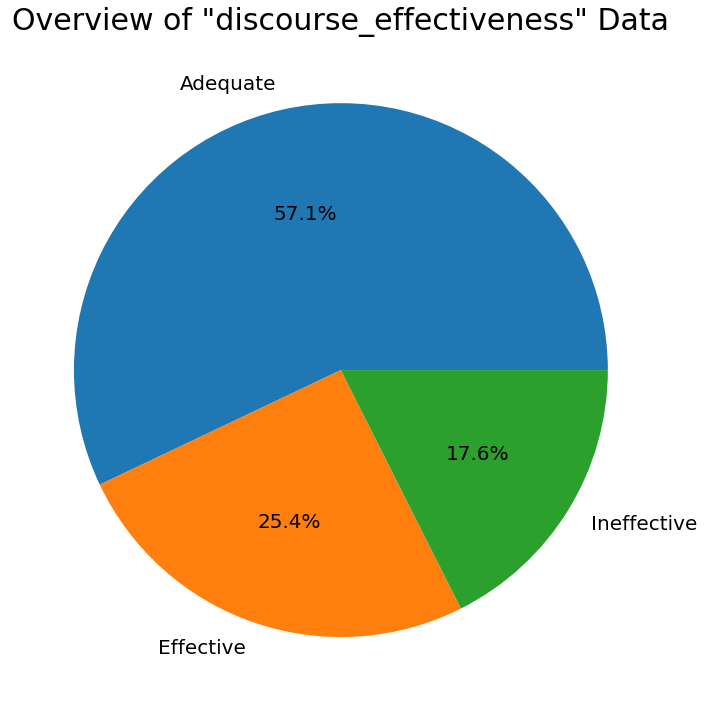

In [8]:
plt.figure(figsize=(10,10))
labels = ['Adequate','Effective', 'Ineffective']
plt.title('Overview of "discourse_effectiveness" Data', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [9]:
# label encode 'discourse_effectiveness'
le = LabelEncoder()
df['discourse_effectiveness_values'] = le.fit_transform(df.discourse_effectiveness.values)
df.tail()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_effectiveness_values
36760,9f63b687e76a,FFA381E58FC6,For many people they don't like only asking one person for advice because somebody might give better advice than someone else,Claim,Adequate,0
36761,9d5bd7d86212,FFA381E58FC6,also people have different views and opinions on things.,Claim,Adequate,0
36762,f1b78becd573,FFA381E58FC6,Advice is something that can impact a persons view in many ways. It can be helpful or harmful depending on what you say.,Position,Adequate,0
36763,cc184624ca8e,FFA381E58FC6,"someone can use everything that many people said and use it to help them. Somebody might ask for an opinion of how they look, or what someone thinks of something.\n\nThe person that wants an opinion might want to ask many people because they want to know what is better to do, use, or wear. People always ask for an opinion. Some people do things based on someones' advice because they think it will be better or make the other person happy",Evidence,Ineffective,2
36764,c8a973681feb,FFA381E58FC6,In conclusion asking for an opinion can be beneficial to someone.,Concluding Statement,Ineffective,2


In [10]:
# Created functions for Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
df['punctuation'] = df['discourse_text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['tokenized'] = df['punctuation'].apply(lambda x: tokenization(x.lower()))

#remove last comma from tokenization
df['tokenized'] = [[s for s in l if s] for l in df['tokenized']]

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))

print(df['tokenized'][1])
df.head(1)

['on', 'my', 'perspective', 'i', 'think', 'that', 'the', 'face', 'is', 'a', 'natural', 'landform', 'because', 'i', 'dont', 'think', 'that', 'there', 'is', 'any', 'life', 'on', 'mars', 'in', 'these', 'next', 'few', 'paragraphs', 'ill', 'be', 'talking', 'about', 'how', 'i', 'think', 'that', 'is', 'is', 'a', 'natural', 'landform']


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_effectiveness_values,punctuation,tokenized,nonstop,stemmed
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate,0,Hi im Isaac im going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it The story is about how NASA took a picture of Mars and a face was seen on the planet NASA doesnt know if the landform was created by life on Mars or if it is just a natural landform,"[hi, im, isaac, im, going, to, be, writing, about, how, this, face, on, mars, is, a, natural, landform, or, if, there, is, life, on, mars, that, made, it, the, story, is, about, how, nasa, took, a, picture, of, mars, and, a, face, was, seen, on, the, planet, nasa, doesnt, know, if, the, landform, was, created, by, life, on, mars, or, if, it, is, just, a, natural, landform]","[hi, im, isaac, im, going, writing, face, mars, natural, landform, life, mars, made, story, nasa, took, picture, mars, face, seen, planet, nasa, doesnt, know, landform, created, life, mars, natural, landform]","[hi, im, isaac, im, go, write, face, mar, natur, landform, life, mar, made, stori, nasa, took, pictur, mar, face, seen, planet, nasa, doesnt, know, landform, creat, life, mar, natur, landform]"


In [11]:
#create dummy variables for 'discourse_type'
y = pd.get_dummies(df.discourse_type)
df = df.join(y)
df.head(1)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_effectiveness_values,punctuation,tokenized,nonstop,stemmed,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate,0,Hi im Isaac im going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it The story is about how NASA took a picture of Mars and a face was seen on the planet NASA doesnt know if the landform was created by life on Mars or if it is just a natural landform,"[hi, im, isaac, im, going, to, be, writing, about, how, this, face, on, mars, is, a, natural, landform, or, if, there, is, life, on, mars, that, made, it, the, story, is, about, how, nasa, took, a, picture, of, mars, and, a, face, was, seen, on, the, planet, nasa, doesnt, know, if, the, landform, was, created, by, life, on, mars, or, if, it, is, just, a, natural, landform]","[hi, im, isaac, im, going, writing, face, mars, natural, landform, life, mars, made, story, nasa, took, picture, mars, face, seen, planet, nasa, doesnt, know, landform, created, life, mars, natural, landform]","[hi, im, isaac, im, go, write, face, mar, natur, landform, life, mar, made, stori, nasa, took, pictur, mar, face, seen, planet, nasa, doesnt, know, landform, creat, life, mar, natur, landform]",0,0,0,0,1,0,0


In [18]:
# count of the number of words in 'discourse_text'
df['word_count_discourse_text'] = df['discourse_text'].str.split().str.len()

df.head(2)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_effectiveness_values,punctuation,tokenized,nonstop,stemmed,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal,word_count_discourse_text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate,0,Hi im Isaac im going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it The story is about how NASA took a picture of Mars and a face was seen on the planet NASA doesnt know if the landform was created by life on Mars or if it is just a natural landform,"[hi, im, isaac, im, going, to, be, writing, about, how, this, face, on, mars, is, a, natural, landform, or, if, there, is, life, on, mars, that, made, it, the, story, is, about, how, nasa, took, a, picture, of, mars, and, a, face, was, seen, on, the, planet, nasa, doesnt, know, if, the, landform, was, created, by, life, on, mars, or, if, it, is, just, a, natural, landform]","[hi, im, isaac, im, going, writing, face, mars, natural, landform, life, mars, made, story, nasa, took, picture, mars, face, seen, planet, nasa, doesnt, know, landform, created, life, mars, natural, landform]","[hi, im, isaac, im, go, write, face, mar, natur, landform, life, mar, made, stori, nasa, took, pictur, mar, face, seen, planet, nasa, doesnt, know, landform, creat, life, mar, natur, landform]",0,0,0,0,1,0,0,67
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate,0,On my perspective I think that the face is a natural landform because I dont think that there is any life on Mars In these next few paragraphs Ill be talking about how I think that is is a natural landform,"[on, my, perspective, i, think, that, the, face, is, a, natural, landform, because, i, dont, think, that, there, is, any, life, on, mars, in, these, next, few, paragraphs, ill, be, talking, about, how, i, think, that, is, is, a, natural, landform]","[perspective, think, face, natural, landform, dont, think, life, mars, next, paragraphs, ill, talking, think, natural, landform]","[perspect, think, face, natur, landform, dont, think, life, mar, next, paragraph, ill, talk, think, natur, landform]",0,0,0,0,0,1,0,41


In [45]:
# needs fixing, not getting the correct number of syllables
# get number of syllables 
syllables = []
for i in range(len(df['punctuation'])):
    x = syllapy.count(df['punctuation'][i])
    syllables.append(x)
pd.DataFrame(syllables)

In [41]:
# other functions to make #

# average number of syllables per word for each 'discourse_text'

# syllable count of word with the most syllables for each 'discourse_text'
df.head(5)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_effectiveness_values,punctuation,tokenized,nonstop,stemmed,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal,word_count_discourse_text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate,0,Hi im Isaac im going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it The story is about how NASA took a picture of Mars and a face was seen on the planet NASA doesnt know if the landform was created by life on Mars or if it is just a natural landform,"[hi, im, isaac, im, going, to, be, writing, about, how, this, face, on, mars, is, a, natural, landform, or, if, there, is, life, on, mars, that, made, it, the, story, is, about, how, nasa, took, a, picture, of, mars, and, a, face, was, seen, on, the, planet, nasa, doesnt, know, if, the, landform, was, created, by, life, on, mars, or, if, it, is, just, a, natural, landform]","[hi, im, isaac, im, going, writing, face, mars, natural, landform, life, mars, made, story, nasa, took, picture, mars, face, seen, planet, nasa, doesnt, know, landform, created, life, mars, natural, landform]","[hi, im, isaac, im, go, write, face, mar, natur, landform, life, mar, made, stori, nasa, took, pictur, mar, face, seen, planet, nasa, doesnt, know, landform, creat, life, mar, natur, landform]",0,0,0,0,1,0,0,67
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate,0,On my perspective I think that the face is a natural landform because I dont think that there is any life on Mars In these next few paragraphs Ill be talking about how I think that is is a natural landform,"[on, my, perspective, i, think, that, the, face, is, a, natural, landform, because, i, dont, think, that, there, is, any, life, on, mars, in, these, next, few, paragraphs, ill, be, talking, about, how, i, think, that, is, is, a, natural, landform]","[perspective, think, face, natural, landform, dont, think, life, mars, next, paragraphs, ill, talking, think, natural, landform]","[perspect, think, face, natur, landform, dont, think, life, mar, next, paragraph, ill, talk, think, natur, landform]",0,0,0,0,0,1,0,41
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,Claim,Adequate,0,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,"[i, think, that, the, face, is, a, natural, landform, because, there, is, no, life, on, mars, that, we, have, descovered, yet]","[think, face, natural, landform, life, mars, descovered, yet]","[think, face, natur, landform, life, mar, descov, yet]",1,0,0,0,0,0,0,21
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, ""It's not easy to target Cydonia,"" in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.",Evidence,Adequate,0,If life was on Mars we would know by now The reason why I think it is a natural landform because nobody live on Mars in order to create the figure It says in paragraph Its not easy to target Cydonia in which he is saying that its not easy to know if it is a natural landform at this point In all that theyre saying its probably a natural landform,"[if, life, was, o

In [48]:
df.to_csv(path_or_buf='Data/' +'processed_data.csv',index=False)